In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('./winequality_merged.csv')

In [3]:
dataset.shape

(6497, 13)

In [18]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
red_wine                False
dtype: bool

In [6]:
###dataset = dataset.fillna(method='ffill')

In [43]:
X = dataset[['fixed acidity', 'volatile acidity', 
             'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 
             'density', 'pH', 'sulphates','alcohol']]

y = dataset['quality']

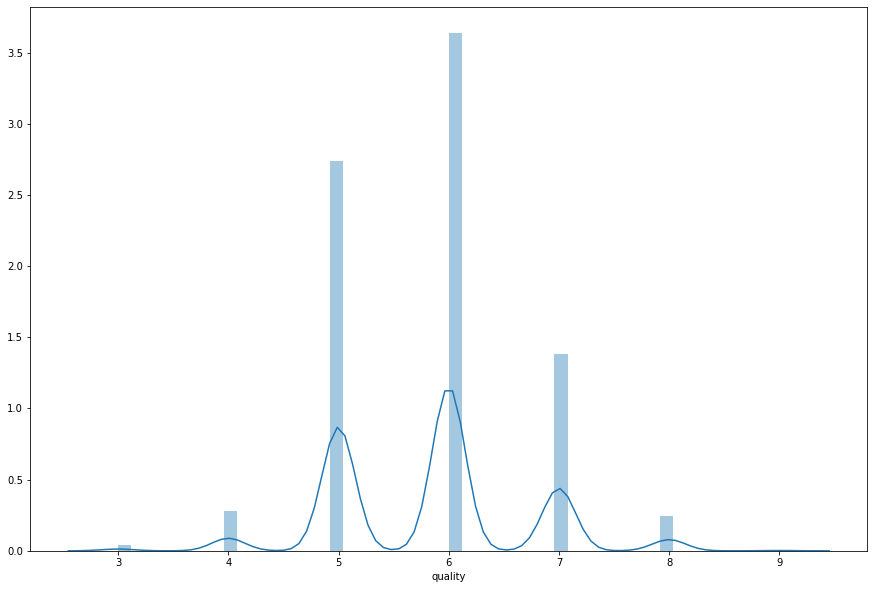

In [44]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.distplot(dataset['quality'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [47]:
y.size

6497

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.074567
volatile acidity,-1.302911
citric acid,-0.112847
residual sugar,0.044542
chlorides,-0.693049
free sulfur dioxide,0.005649
total sulfur dioxide,-0.002450
density,-57.695594
pH,0.479531
sulphates,0.767018


In [50]:
y_pred = regressor.predict(X_test)

In [51]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

df1 = df.head(25)

In [52]:
df1

,Actual,Predicted
5316,6,5.469321
5210,6,6.347334
3518,6,5.745761
1622,5,4.739740
2443,8,6.152253
3521,5,5.654720
5211,6,6.153215
4936,6,5.567579
1161,6,5.757363
5993,6,6.301768


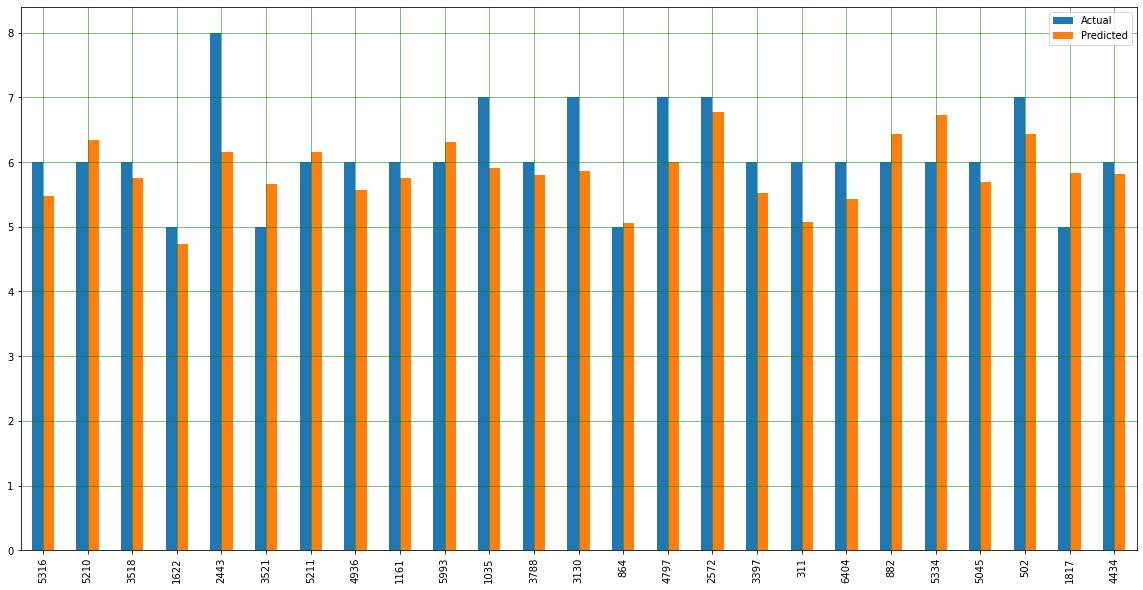

In [56]:
df1.plot(kind = 'bar', figsize=(20, 10))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

In [60]:
## finding MAE, MSE and RMSE
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sqrd Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sqrd Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', metrics.r2_score(y_test, y_pred))

Mean Abs Error:  0.5824428604594513
Mean Sqrd Error:  0.5482963770969075
Root Mean Sqrd Error:  0.7404703755700882
R2 score:  0.2941881310393515


## root mean squared error is 0.74, which is slightly greater than 10% of the mean value which is 5.81. 

In [77]:
## conclusion
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y.mean()*100
print(f'rmse over mean value: {rmse_mean:.2f}%')

rmse over mean value: 12.73%
